In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing  

# 1번

In [2]:
df = pd.read_csv('data/trees.csv')

In [3]:
df.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [4]:
data = df.values

In [5]:
xdata = data[:,:-1]
ydata = data[:,[-1]]

In [6]:
feature_scale = preprocessing.MinMaxScaler()
xdataN = feature_scale.fit_transform(xdata)

label_scale = preprocessing.MinMaxScaler()
ydataN = label_scale.fit_transform(ydata)

In [7]:
x = tf.placeholder(tf.float32, shape=[None, xdata.shape[1]])
y = tf.constant(ydataN, tf.float32)
w = tf.Variable(tf.random_uniform([xdata.shape[1], 1]))
b = tf.Variable(tf.random_uniform([1]))

hx = tf.matmul(x,w) + b
cost = tf.reduce_mean(tf.square(hx-y))

optimizer = tf.train.AdamOptimizer(0.1) #learning rate
train = optimizer.minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(100000):
    sess.run(train, {x:xdataN})
#     print(i, sess.run(cost, {x:xdataN}))    

In [8]:
sess.run(w)

array([[0.8669156 ],
       [0.12188047]], dtype=float32)

In [9]:
sess.run(b)

array([-0.11583107], dtype=float32)

In [10]:
arr = feature_scale.transform([[8.8, 63], [10.5, 72]])
label_scale.inverse_transform(sess.run(hx, {x:arr}))

array([[ 4.8165483],
       [15.873469 ]], dtype=float32)

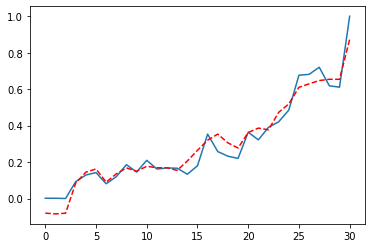

In [17]:
plt.plot(ydataN)
plt.plot(sess.run(hx, {x:xdataN}),'r--')
plt.show()

# 2번

In [4]:
def fn( v ):
    if v >= 40.:
        return '크다'
    elif 30. <= v < 40.:
        return '보통'
    else :
        return '적음'    

In [6]:
df['정도'] =df['Volume'].apply( fn )

In [15]:
df['Girth'].nlargest(5, keep='all')

30    20.6
28    18.0
29    18.0
27    17.9
26    17.5
Name: Girth, dtype: float64

In [ ]:
# pip uninstall pandas
# pip install pandas

In [14]:
df.nlargest(5,'Girth',keep='all')

,Girth,Height,Volume,정도
30,20.6,87,77.0,크다
28,18.0,80,51.5,크다
29,18.0,80,51.0,크다
27,17.9,80,58.3,크다
26,17.5,82,55.7,크다


In [12]:
list1 = []
for v in df['Volume']:
    if v >= 40.:
        list1.append('크다')
    elif 30. <= v < 40.:
        list1.append('보통')
    else :
        list1.append('적음')
df['정도'] = list1

In [13]:
df

,Girth,Height,Volume,정도
0,8.3,70,10.3,적음
1,8.6,65,10.3,적음
2,8.8,63,10.2,적음
3,10.5,72,16.4,적음
4,10.7,81,18.8,적음
5,10.8,83,19.7,적음
6,11.0,66,15.6,적음
7,11.0,75,18.2,적음
8,11.1,80,22.6,적음
9,11.2,75,19.9,적음


# 3번

In [14]:
df['Height'].max()

87

In [15]:
df['Height'].min()

63

# 4번

In [16]:
df.sort_values(by='Girth', ascending=False).head(5)

,Girth,Height,Volume,정도
30,20.6,87,77.0,크다
29,18.0,80,51.0,크다
28,18.0,80,51.5,크다
27,17.9,80,58.3,크다
26,17.5,82,55.7,크다
